<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Computer-Vision/blob/main/2348505_CV_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**IMAGE TRANSFORMATION**

Image Transformation involves the transformation of image data in order to retrieve information from the image or preprocess the image for further usage. In this tutorial we are going to implement the following image transformation:

1. Image Translation
2. Reflection
3. Rotation
4. Scaling
5. Cropping
6. Shearing in x-axis
7. Shearing in y-axis

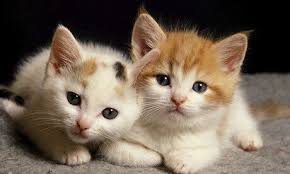

In [67]:
cv2_imshow(image)

**Image Translation**

In computer vision or image processing, image translation is the rectilinear shift of an image from one location to another, so the shifting of an object is called translation. In other words,  translation is the shifting of an object’s location.

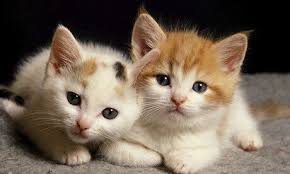

In [65]:
image = cv2.imread('img3.jpeg')
identity_matrix = np.float32([[1, 0, 0], [0, 1, 0]])
identity_transformed = cv2.warpAffine(image, identity_matrix, (image.shape[1], image.shape[0]))
cv2_imshow(identity_transformed)

In the first argument, we passed the image, in the second argument it takes a matrix as a parameter in the matrix we give x = 100, which means we are telling the function to shift the image 70 units on the right side and y= 50, which means we are telling the function to shift the image 50 units downwards.  In the third argument, where we mentioned the cols and rows, we told the function to do not to crop the image from both the x and y sides.

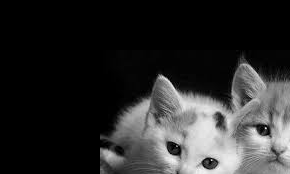

In [ ]:
#Taking image as grayscale
img = cv2.imread('img3.jpeg', 0)
rows, cols = img.shape
M = np.float32([[1, 0, 100], [0, 1, 50]])
dst = cv2.warpAffine(img, M, (cols, rows))
cv2_imshow(dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Image Reflection**

Image reflection is used to flip the image vertically or horizontally. For reflection along the x-axis, we set the value of Sy to -1, Sx to 1, and vice-versa for the y-axis reflection.

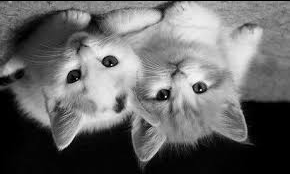

In [ ]:
img = cv2.imread('img3.jpeg', 0)
rows, cols = img.shape
M = np.float32([[1,  0, 0],
                [0, -1, rows],
                [0,  0, 1]])
reflected_img = cv2.warpPerspective(img, M,(int(cols),int(rows)))
cv2_imshow(reflected_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Image Rotation**

Image rotation is a common image processing routine with applications in matching, alignment, and other image-based algorithms, in image rotation the image is rotated by a definite angle. It is used extensively in data augmentation, especially when it comes to image classification. We have used the get rotation matrix function to define the parameter required in the warpAffine function to tell the function to make a matrix that can give a required rotation angle( here it is 30 degrees) with shrinkage of the image by 40%.   

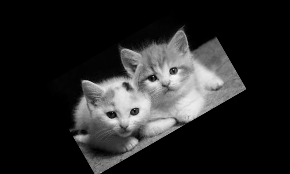

In [46]:
img = cv2.imread('img3.jpeg', 0)
rows, cols = img.shape
M = np.float32([[1,  0, 0], [0, -1, rows], [0,  0, 1]])
img_rotation = cv2.warpAffine(img,cv2.getRotationMatrix2D((cols/2, rows/2),30, 0.6),(cols, rows))
cv2_imshow(img_rotation)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Image Scaling**

Image scaling is a process used to resize a digital image. We perform two things in the image scaling either we enlarge the image or we shrink the image, OpenCV has a built-in function cv2.resize() for image scaling.

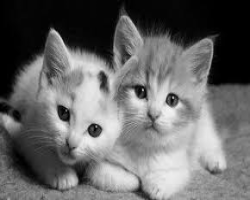

In [73]:
img = cv2.imread('img3.jpeg', 0)
rows, cols = img.shape
img_shrinked = cv2.resize(img, (250, 200),
                         interpolation=cv2.INTER_AREA)

img_enlarged = cv2.resize(img_shrinked, None,
                         fx=1.5, fy=1.5,
                         interpolation=cv2.INTER_CUBIC)
cv2_imshow(img_shrinked)
cv2.waitKey(0)
cv2.destroyAllWindows()

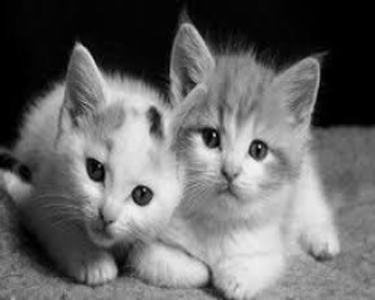

In [52]:
cv2_imshow(img_enlarged)

**Image Cropping**

Cropping is the removal of unwanted outer areas from an image.
OpenCV loads the image as a NumPy array, we can crop the image simply by indexing the array, in our case, we choose to get 200 pixels from 100 to 300 on both axes.

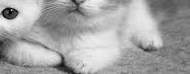

In [ ]:
img = cv2.imread('img3.jpeg', 0)
cropped_img = img[100:300, 100:300]
cv2_imshow(cropped_img)
cv2.imwrite('cropped_out.jpg', cropped_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Image Shearing**

While the shearing image is on the x-axis, the boundaries of the image that are parallel to the x-axis keep their location, and the edges parallel to the y-axis change their place depending on the shearing factor.

When shearing is done in the y-axis direction, the boundaries of the image that are parallel to the y-axis keep their location, and the edges parallel to the x-axis change their place depending on the shearing factor.

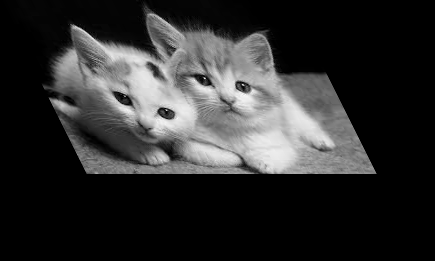

In [51]:
img = cv2.imread('img3.jpeg', 0)
rows, cols = img.shape
M = np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]])
sheared_img = cv2.warpPerspective(img, M, (int(cols*1.5), int(rows*1.5)))
cv2_imshow(sheared_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

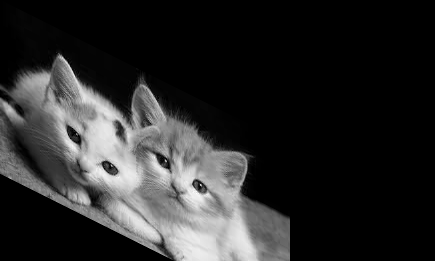

In [ ]:
img = cv2.imread('img3.jpeg', 0)
rows, cols = img.shape
M = np.float32([[1,   0, 0], [0.5, 1, 0], [0,   0, 1]])
sheared_img = cv2.warpPerspective(img, M, (int(cols*1.5), int(rows*1.5)))
cv2_imshow(sheared_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

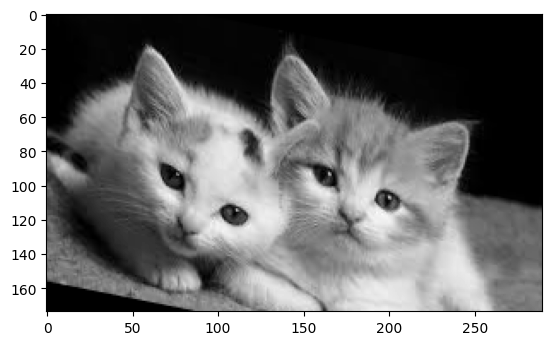

In [55]:
img = cv2.imread('img3.jpeg',0)
H, W = img.shape
M2 = np.float32([[1, 0, 0], [0.2, 1, 0]])
M2[0,2] = -M2[0,1] * W/2
M2[1,2] = -M2[1,0] * H/2
aff2 = cv2.warpAffine(img, M2, (W, H))

plt.imshow(aff2, cmap="gray")

**Combining all the results**

(-0.5, 289.5, 173.5, -0.5)

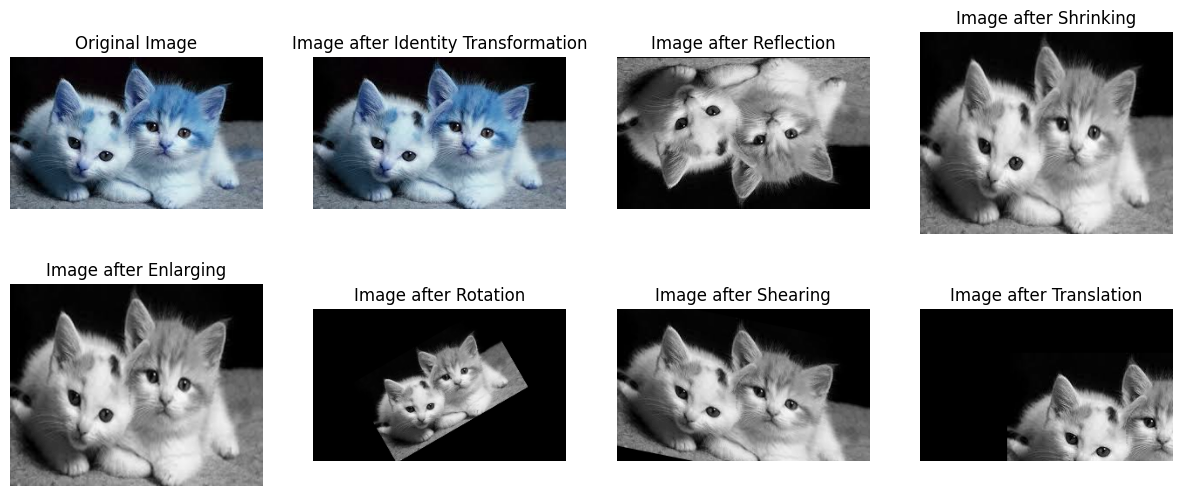

In [74]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))
ax[0, 0].imshow(image,"gray")
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')
ax[0, 1].imshow(identity_transformed,"gray")
ax[0, 1].set_title('Image after Identity Transformation')
ax[0, 1].axis('off')
ax[0, 2].imshow(reflected_img, "gray")
ax[0, 2].set_title('Image after Reflection')
ax[0, 2].axis('off')
ax[0, 3].imshow(img_shrinked, "gray")
ax[0, 3].set_title('Image after Shrinking')
ax[0, 3].axis('off')
ax[1, 0].imshow(img_enlarged, "gray")
ax[1, 0].set_title('Image after Enlarging')
ax[1, 0].axis('off')
ax[1, 1].imshow(img_rotation, "gray")
ax[1, 1].set_title('Image after Rotation')
ax[1, 1].axis('off')
ax[1, 2].imshow(aff2, "gray")
ax[1, 2].set_title('Image after Shearing')
ax[1, 2].axis('off')
ax[1, 3].imshow(dst, "gray")
ax[1, 3].set_title('Image after Translation')
ax[1, 3].axis('off')